In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

from keras import layers, Model
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Ensure TensorFlow backend
os.environ["KERAS_BACKEND"] = "tensorflow"

# Data Analysis

## Dataset Basic Infos

### About Dataset
#### Alzheimer Features For Analysis
Group is a target for models

Group --> Class

Age --> Age

EDUC --> Years of Education

SES --> Socioeconomic Status / 1-5

MMSE --> Mini Mental State Examination

CDR --> Clinical Dementia Rating

eTIV --> Estimated total intracranial volume

nWBV --> Normalize Whole Brain Volume

ASF --> Atlas Scaling Factor

You can use it as a categorical variable:

Group

Age

EDUC

In [ ]:
file_name = "alzheimer.csv"

data = pd.read_csv(file_name, sep=',')
display(data.head())

# Display basic information about the dataset
print("Shape of the DataFrame:")
print(data.shape)
print("\nColumns in the DataFrame:")
print(data.columns)

print("\nData types of the columns:")
print(data.dtypes)

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


Shape of the DataFrame:
(373, 10)

Columns in the DataFrame:
Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

Data types of the columns:
Group     object
M/F       object
Age        int64
EDUC       int64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
dtype: object


## Check for any missing values or any duplicate rows

In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())

print("\nDuplicate Rows:")
print(data.duplicated().sum())


Missing Values:
Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

Duplicate Rows:
0


## Analysis

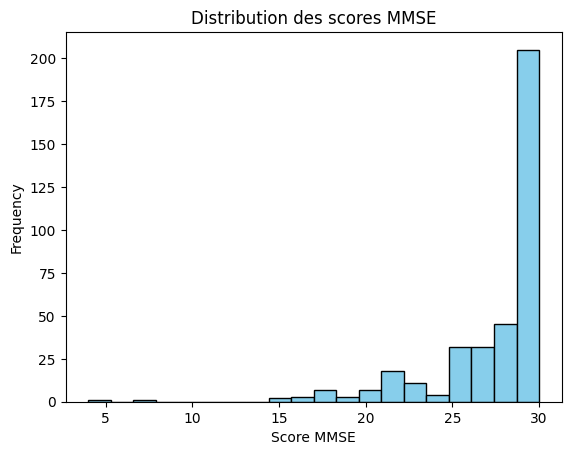

In [ ]:
# Histogram of MMSE
plt.hist(data['MMSE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des scores MMSE')
plt.xlabel('Score MMSE')
plt.ylabel('Frequency')
plt.show()

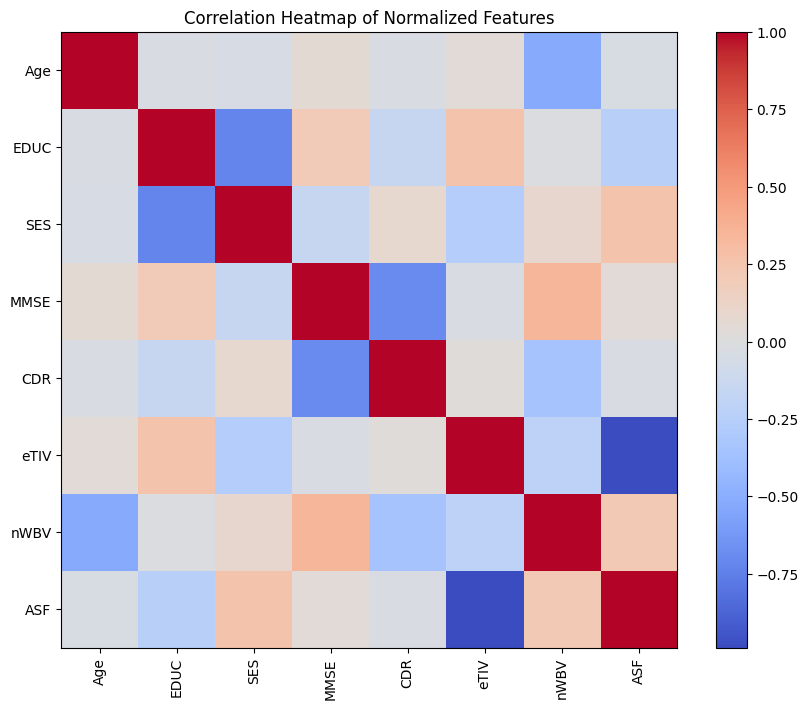

In [ ]:
# Normalizing variables before creating the heatmap
numerical_columns = data.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
numerical_columns_scaled = scaler.fit_transform(numerical_columns)
numerical_columns_scaled_df = pd.DataFrame(numerical_columns_scaled, columns=numerical_columns.columns)
correlations = numerical_columns_scaled_df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlations, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlations)), correlations.columns, rotation=90)
plt.yticks(range(len(correlations)), correlations.columns)
plt.title('Correlation Heatmap of Normalized Features')
plt.show()

In [ ]:
mmse_correlations = correlations['MMSE']
correlated_abs = mmse_correlations.drop('MMSE').abs().sort_values(ascending=False).head(7)
print("Correlation of the features with MMSE (absolute values):")
print(correlated_abs)

Correlation of the features with MMSE (absolute values):
CDR     0.686519
nWBV    0.341912
EDUC    0.194884
SES     0.149219
Age     0.055612
ASF     0.040052
eTIV    0.032084
Name: MMSE, dtype: float64


# Machine Learning

## First model

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64
Model:
Mean Absolute Error: 1.634393607758317
Mean Squared Error: 5.1592900160725295
R-squared: 0.6267725593963949
Root Mean Squared Error: 2.2714070564459665


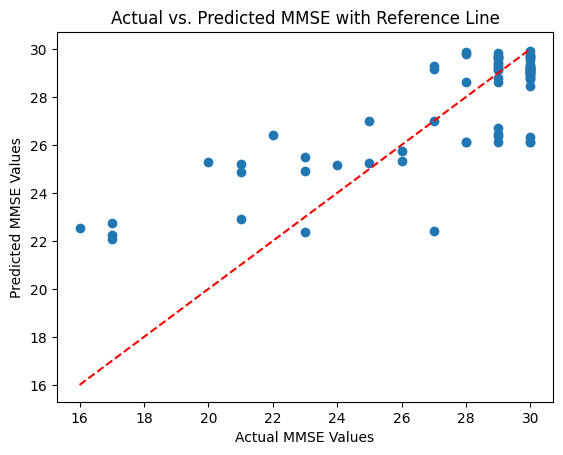

In [ ]:
data_cleaned = data.dropna()
print(data_cleaned.isnull().sum())

print("Model:")
X = data_cleaned[['CDR', 'nWBV', 'EDUC', 'SES']]
y = data_cleaned['MMSE']

# Splitting the data_cleaned into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating and fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the target values
y_pred = model.predict(X_test)

# Calculating Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Calculating R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual MMSE Values')
plt.ylabel('Predicted MMSE Values')
plt.title('Actual vs. Predicted MMSE with Reference Line')
plt.show()

## Second model

Model:
Mean Absolute Error: 1.7963576743516476
Mean Squared Error: 5.625729143238671
R-squared: 0.5082909156352426
Root Mean Squared Error: 2.371861957036849


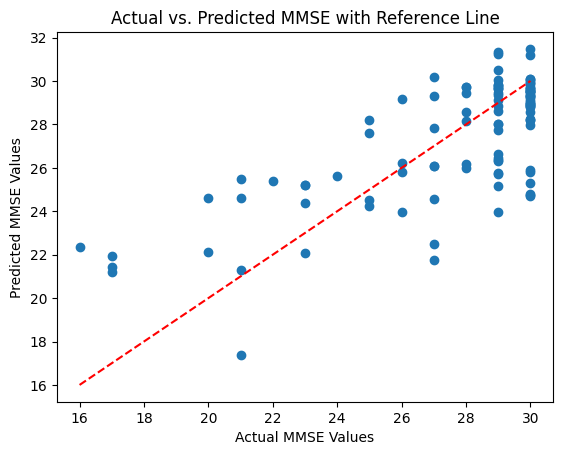

In [ ]:
print("Model:")
X = data_cleaned[['CDR', 'nWBV', 'EDUC', 'SES', 'Age', 'ASF', 'eTIV']]
y = data_cleaned['MMSE']

# Splitting the data_cleaned into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Creating and fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the target values
y_pred = model.predict(X_test)

# Calculating Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Calculating R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual MMSE Values')
plt.ylabel('Predicted MMSE Values')
plt.title('Actual vs. Predicted MMSE with Reference Line')
plt.show()

## Third Model

Model:
Mean Absolute Error: 1.7615286157937713
Mean Squared Error: 5.854228934178065
R-squared: 0.4883192070585184
Root Mean Squared Error: 2.4195513911008515


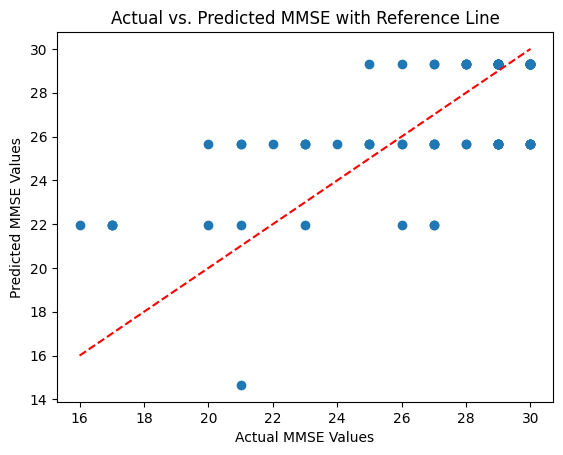

In [ ]:
print("Model:")
X = data_cleaned[['CDR']]
y = data_cleaned['MMSE']

# Splitting the data_cleaned into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Creating and fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the target values
y_pred = model.predict(X_test)

# Calculating Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Calculating R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual MMSE Values')
plt.ylabel('Predicted MMSE Values')
plt.title('Actual vs. Predicted MMSE with Reference Line')
plt.show()

# Multi-Layer Perceptron

Root Mean Squared Error: 3.4597253794682605


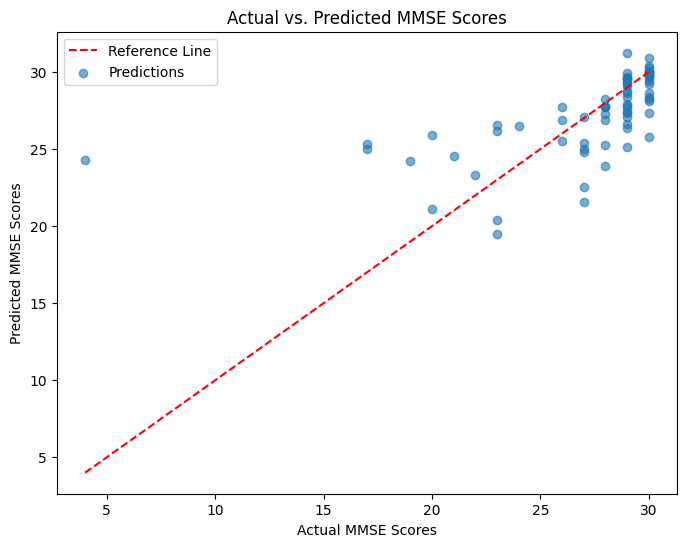

In [ ]:
X = data_cleaned.drop(columns=['MMSE'])
y = data_cleaned['MMSE']

X = pd.get_dummies(X, drop_first=True)

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42, test_size=0.25)

mlp_reg = MLPRegressor(hidden_layer_sizes=[25, 25, 25], random_state=42, max_iter=1000)
pipeline = make_pipeline(StandardScaler(), mlp_reg)

pipeline.fit(X_train, y_train)

# Predict MMSE scores for the validation set
y_pred = pipeline.predict(X_valid)

# Calculate the Root Mean Squared Error (RMSE) between actual and predicted MMSE scores
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Root Mean Squared Error:", rmse)

plt.figure(figsize=(8, 6))
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], linestyle='--', color='red', label="Reference Line")
plt.scatter(y_valid, y_pred, alpha=0.6, label="Predictions")
plt.xlabel('Actual MMSE Scores')
plt.ylabel('Predicted MMSE Scores')
plt.title('Actual vs. Predicted MMSE Scores')
plt.legend()
plt.show()

## Optimizing the MLP model

### Root Mean Squared Error Anlaysis to optimiz the model
*   Basic parameters: 3.46

MLPRegressor:
*   hidden_layer_sizes 2 layers of 100: 3.29
*   hidden_layer_sizes 3 layers of 100: 3.28

train_test_split (test):
*   test_size 0.15: 2.39
*   test_size 0.3: 2.9

train_test_split (valid):
*   test_size 0.3: 3.12
*   test_size 0.2: 3.69

Combined test:

test_size(test) 0.15 + test_size(valid) 0.3: 2.32

Root Mean Squared Error: 2.3227430322433533


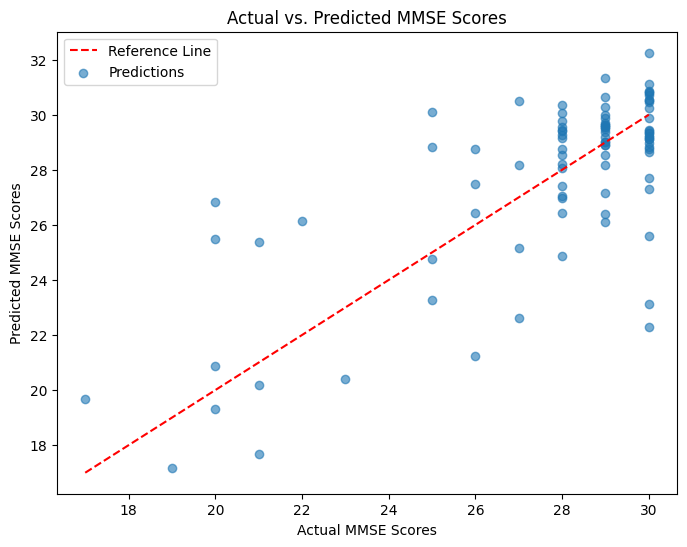

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42, test_size=0.15)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42, test_size=0.3)

mlp_reg = MLPRegressor(hidden_layer_sizes=[25, 25, 25], random_state=42, max_iter=1000)
pipeline = make_pipeline(StandardScaler(), mlp_reg)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Root Mean Squared Error:", rmse)

plt.figure(figsize=(8, 6))
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], linestyle='--', color='red', label="Reference Line")
plt.scatter(y_valid, y_pred, alpha=0.6, label="Predictions")
plt.xlabel('Actual MMSE Scores')
plt.ylabel('Predicted MMSE Scores')
plt.title('Actual vs. Predicted MMSE Scores')
plt.legend()
plt.show()

# Artificial Neural Network

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 769.3918 - val_loss: 740.5870
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 755.7344 - val_loss: 728.4692
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 749.5048 - val_loss: 716.4838
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 731.7659 - val_loss: 704.5210
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 721.7405 - val_loss: 692.5036
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 707.7092 - val_loss: 680.3366
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 696.3586 - val_loss: 667.9874
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 680.8184 - val_loss: 655.5287
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 664.9840 - val_loss: 642.7747
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 656.6938 - val_loss: 629.5993
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 641.9512 - val_loss: 615.9678
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 

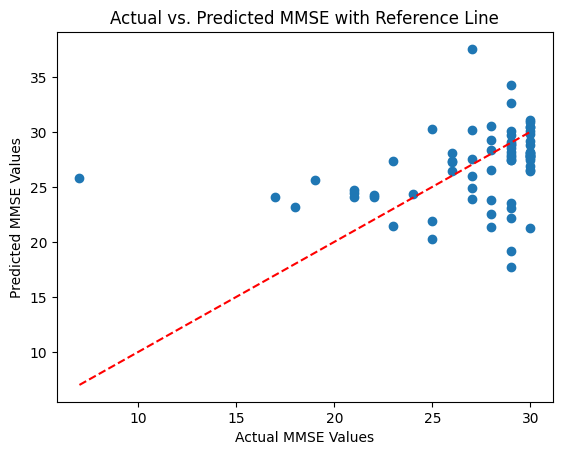

In [ ]:
X = data_cleaned.drop(columns=['MMSE', 'Age', 'ASF', 'eTIV'])
y = data_cleaned['MMSE']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a Sequential neural network model
model = Sequential()
model.add(Dense(units=512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=1, activation='linear'))

model.compile(optimizer=Adam(), loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=100, batch_size=128, validation_data=(X_test_scaled, y_test), verbose=1)

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual MMSE Values')
plt.ylabel('Predicted MMSE Values')
plt.title('Actual vs. Predicted MMSE with Reference Line')
plt.show()

## Optimizing the ANN model

### Root Mean Squared Error Anlaysis to optimiz the model
*   Basic parameters: 4.7
*   Train test split 30%: 5.12
*   Train test split 50%: 5.01
*   256 units: 5.74
*   1024 units: 3.89

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 757.1890 - val_loss: 730.9883
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 740.6047 - val_loss: 713.1716
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 722.9684 - val_loss: 695.6522
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 709.2040 - val_loss: 678.0765
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 692.0640 - val_loss: 660.2859
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 673.1981 - val_loss: 642.1148
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 652.7446 - val_loss: 623.4338
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 629.1998 - val_loss: 604.0901
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 611.5869 - val_loss: 584.0475
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 592.2704 - val_loss: 563.1579
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 571.5756 - val_loss: 541.3946
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1

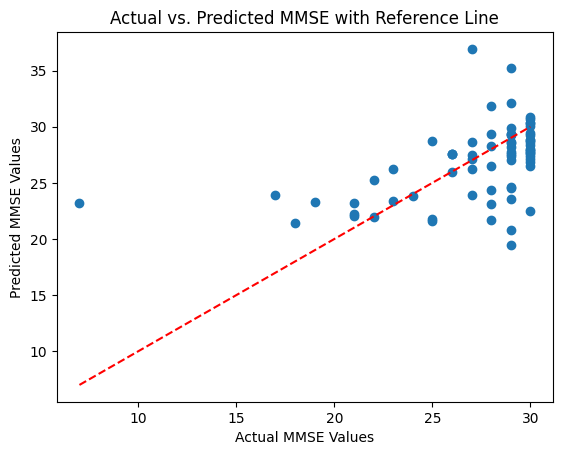

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(units=1024, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=1, activation='linear'))

model.compile(optimizer=Adam(), loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=100, batch_size=128, validation_data=(X_test_scaled, y_test), verbose=1)

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual MMSE Values')
plt.ylabel('Predicted MMSE Values')
plt.title('Actual vs. Predicted MMSE with Reference Line')
plt.show()


# Conclusion

The best model we managed to create is the basic Machine Learning model, with a mean squared error of 2.27 points